# Capstone Webscrapping using BeautifulSoup

>2020 is a difficult year of recession due to the pandemic. proceeded unstable government policies regarding partial quarantine caused public sentiment to become inflamed, affecting GDP growth drastically fell by -5.3% YoY ensuing the sudden downfall of the worldwide economic situation (and perceptibly, Indonesia's growth was still above worldwide average GDP). 
<br><br>These conditions produced extra-volatile exchange rate movements especially IDR's movement. **DBS 2021 Outlook projected that 2021 would be a stable exchange rate year for Indonesia stated by IDR14000 - IDR15000** not as gloomy as in the past year when upon the same month (draft on March 8,  2021), Indonesia was facing the upcoming depression of exchange rate that rose until IDR16000 on the next few weeks thereafter.

Taking on these situations, this notebook would deliver about the exchange rate on Quarter 1 2021 based on USD to IDR.

This notebook contains guidances & tasks on the data processing for the application, report about current exchange daily (dynamically set) based on <a href='https://www.exchange-rates.org/history/IDR/USD/T '>exchange-rate.org</a> website.

Without further ado, let's get started!

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [44]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [67]:
url_get.content[1:100]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<!'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [46]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. For fetch the only exchange rate table, the `attrs={}` should have the specific class that embedded the values and for this case, the values store in `table` tag and we explore the other attributes (mostly class of the tag) shows below.

In [47]:
table = soup.find('table', attrs={'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:300])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/5/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-5-2021">
     14,292.17893
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden"


The data stores based on table structure on HTML. based on <a href='https://www.w3schools.com/html/html_tables.asp'>W3Schools Table HTML</a>, there are 3 basic components on `table` tag:

1. `<tr>`, for specifying table row / record.
2. `<th>`, for stating the header of each columns on the table
3. `<td>`, for stating the values on the table

as the basic terms, each `tr` contains one record, each record has bunch of values that stored in `td`. This kind of type could be transferred to DataFrame for us to be analyzed on python.

Do the scrapping process here 

In [48]:
[ci.extract() for ci in table.find_all("tr", {'class':'inline-grid-ad-row'})]
tr=table.find_all('tr')

In [49]:
tr

[<tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>,
 <tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>,
 <tr><td>3/1/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-1-2021">14,248.60576</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

In [50]:
temp = [] #initiating a tuple

for i in range(0, len(tr)):

    row = table.find_all('tr')[i]
    
    #get date
    date = row.find_all('td')[0].text
    
    #get er
    er = row.find_all('td')[2].text
    
    temp.append((date,er)) 
    
temp 

[('3/5/2021', '14,292.17893 IDR'),
 ('3/4/2021', '14,261.85426 IDR'),
 ('3/3/2021', '14,257.29443 IDR'),
 ('3/2/2021', '14,256.28041 IDR'),
 ('3/1/2021', '14,248.60576 IDR'),
 ('2/26/2021', '14,300.27815 IDR'),
 ('2/25/2021', '14,139.73096 IDR'),
 ('2/24/2021', '14,083.03673 IDR'),
 ('2/23/2021', '14,092.64503 IDR'),
 ('2/22/2021', '14,118.07274 IDR'),
 ('2/19/2021', '14,066.79375 IDR'),
 ('2/18/2021', '14,013.51318 IDR'),
 ('2/17/2021', '14,015.16095 IDR'),
 ('2/16/2021', '13,935.96629 IDR'),
 ('2/15/2021', '13,918.18725 IDR'),
 ('2/12/2021', '13,988.54710 IDR'),
 ('2/11/2021', '13,982.27900 IDR'),
 ('2/10/2021', '13,994.09212 IDR'),
 ('2/9/2021', '13,920.52018 IDR'),
 ('2/8/2021', '14,007.25257 IDR'),
 ('2/5/2021', '14,008.99630 IDR'),
 ('2/4/2021', '14,020.87878 IDR'),
 ('2/3/2021', '13,997.60682 IDR'),
 ('2/2/2021', '14,004.60175 IDR'),
 ('2/1/2021', '14,025.27450 IDR'),
 ('1/29/2021', '14,027.32457 IDR'),
 ('1/28/2021', '14,048.06146 IDR'),
 ('1/27/2021', '14,048.72649 IDR'),
 ('1

In [51]:
temp = temp[::-1]
temp

[('9/6/2020', '14,754.95155 IDR'),
 ('9/7/2020', '14,743.92989 IDR'),
 ('9/8/2020', '14,839.54267 IDR'),
 ('9/9/2020', '14,783.50009 IDR'),
 ('9/10/2020', '14,871.58664 IDR'),
 ('9/11/2020', '14,865.27553 IDR'),
 ('9/13/2020', '14,876.45021 IDR'),
 ('9/14/2020', '14,864.65988 IDR'),
 ('9/15/2020', '14,843.44670 IDR'),
 ('9/16/2020', '14,807.88761 IDR'),
 ('9/17/2020', '14,829.41738 IDR'),
 ('9/18/2020', '14,730.71792 IDR'),
 ('9/20/2020', '14,728.84529 IDR'),
 ('9/21/2020', '14,701.43420 IDR'),
 ('9/22/2020', '14,751.85786 IDR'),
 ('9/23/2020', '14,825.54899 IDR'),
 ('9/24/2020', '14,888.78607 IDR'),
 ('9/25/2020', '14,855.63943 IDR'),
 ('9/27/2020', '14,859.98349 IDR'),
 ('9/28/2020', '14,892.32194 IDR'),
 ('9/29/2020', '14,880.93210 IDR'),
 ('9/30/2020', '14,867.44686 IDR'),
 ('10/1/2020', '14,822.66605 IDR'),
 ('10/2/2020', '14,852.30483 IDR'),
 ('10/5/2020', '14,797.90178 IDR'),
 ('10/6/2020', '14,857.67854 IDR'),
 ('10/7/2020', '14,705.58246 IDR'),
 ('10/8/2020', '14,692.93025 IDR

## Creating data frame & Data wrangling

Put the array into dataframe

In [52]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Exchange_Rate'))
df.head()

,Date,Exchange_Rate
0,9/6/2020,"14,754.95155 IDR"
1,9/7/2020,"14,743.92989 IDR"
2,9/8/2020,"14,839.54267 IDR"
3,9/9/2020,"14,783.50009 IDR"
4,9/10/2020,"14,871.58664 IDR"


Our dataset has been crawled successfully and it is time to clean up the rest, as python eventually cannot read this data. 
But why?

As we fetch data into the DataFrame, we should analyze it's data type first. Eventually, when we do the crawling with `find()` as above, wo store our values with `.text`, and this function automatically store these values as an object.

let's see on the DataFrame information below.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
Date             134 non-null object
Exchange_Rate    134 non-null object
dtypes: object(2)
memory usage: 2.2+ KB


It was right!
All of the values stored as object, and we should change it into their real types as:
- Date = datetime
- Exchange_Rate = float64

But first, I would like to get the **first** and the **last** date for the 'flask' date range (and show them on HTML!)

In [54]:
Date_1 = df['Date'].iloc[0]
Date_2 = df['Date'].iloc[-1]

Then, set `df['Date']` into datetime64 

In [55]:
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y', dayfirst=True)

In [56]:
df

,Date,Exchange_Rate
0,2020-09-06,"14,754.95155 IDR"
1,2020-09-07,"14,743.92989 IDR"
2,2020-09-08,"14,839.54267 IDR"
3,2020-09-09,"14,783.50009 IDR"
4,2020-09-10,"14,871.58664 IDR"
...,...,...
129,2021-03-01,"14,248.60576 IDR"
130,2021-03-02,"14,256.28041 IDR"
131,2021-03-03,"14,257.29443 IDR"
132,2021-03-04,"14,261.85426 IDR"


In [57]:
df['Month'] = df['Date'].dt.month_name()

And this would be the best part of the Data Cleaning.

column `df['Exchange_Rate']` actually cannot be set as float with `.astype()`, because:
<br>
<table>
<tr>
<th>Exchange Rate</th>
<td>14,256.28041 IDR</td>
</tr>
</table>

this value has `IDR` and `,`, which is not a pure number and should be erased immediately.

let's remove the unnecessary character below

In [58]:
df.Exchange_Rate=df.Exchange_Rate.apply(lambda x: x.replace(',', '')).\
    apply(lambda x: x.replace(' IDR', '')).\
    astype('float64')

last of this journey, set `df['Date']` as the index (for making the line plot based on date)

In [ ]:
df = df.set_index('Date')

And, this would be our super clean DataFrame and get ready for making some beautiful plots from here!

In [60]:
df

,Exchange_Rate,Month
Date,,
2020-09-06,14754.95155,September
2020-09-07,14743.92989,September
2020-09-08,14839.54267,September
2020-09-09,14783.50009,September
2020-09-10,14871.58664,September
...,...,...
2021-03-01,14248.60576,March
2021-03-02,14256.28041,March
2021-03-03,14257.29443,March


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Text(0.5, 1.0, 'Exchange Rate USD-IDR 9/6/2020 - 3/5/2021')

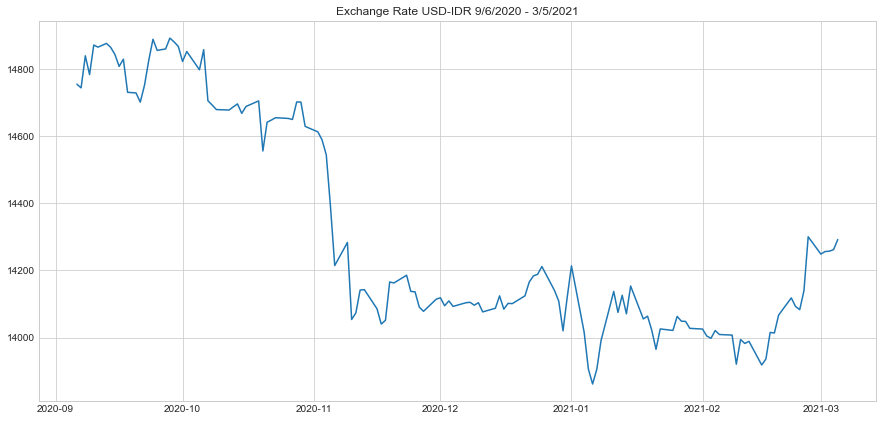

In [66]:
from matplotlib import pyplot as plt

plt.figure(figsize=[15,7])
plt.style.use('seaborn-whitegrid')

plt.plot(df['Exchange_Rate'])
plt.title('Exchange Rate USD-IDR '+Date_1+ ' - ' +Date_2)

This data is ranged by 6 months, from Sep 6, 2020 until Mar 5, 2021. (we could say Q3 2020 - Q1 2021). There is an appreciation from IDR as from November 2020 - February 2021 stable on IDR14000 - IDR14200 and significantly fall on October 2020 to November 2020.

But, keep the sight on March 2021 as the graph slightly increase (probably that's some turning point on the mid-February).

### Extra Challenge

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.